In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import metrics
%matplotlib inline

In [2]:
data = pd.read_csv('kc_house_data.csv')

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.shape 

(21613, 21)

the most important features are id	date	price	bedrooms	bathrooms	sqft_living	sqft_lot	floors	waterfront	view	...	grade	sqft_above	sqft_basement	yr_built	yr_renovated	zipcode	lat	long	sqft_living15	sqft_lot1

In [5]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
#X = data.loc[:, 'id'].values.reshape(-1,1)
#y = data.loc[:, 'price'].values

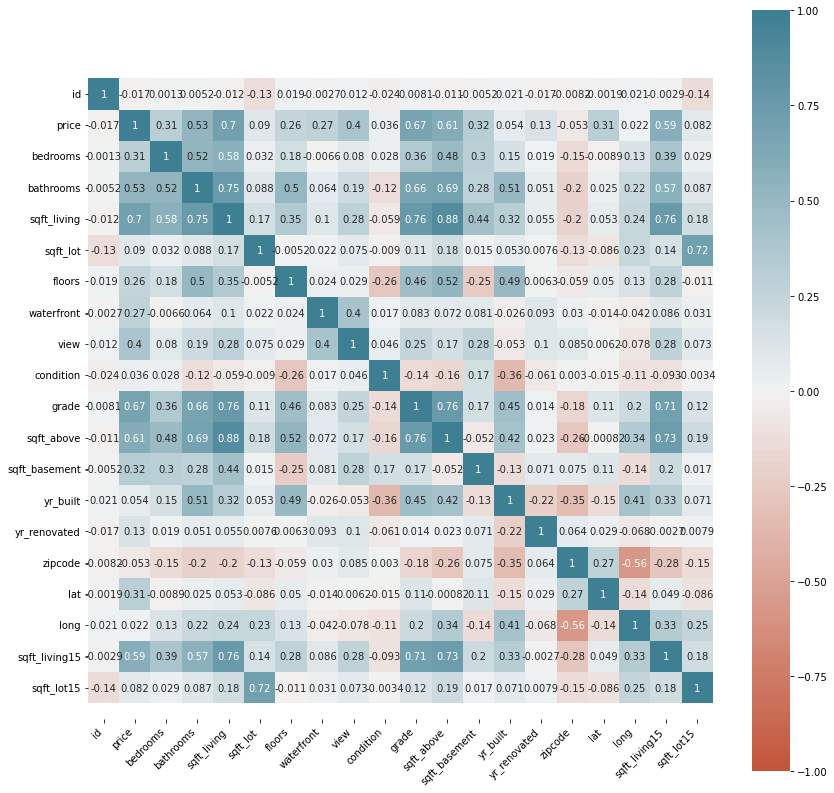

In [7]:
import seaborn as sns
corr = data.corr()

plt.figure(figsize=(14, 14))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True, annot = True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)
ax.set_ylim(len(corr)+0.5, -0.5);
plt.show()

In [8]:
X = data.loc[:, 'sqft_living'].values.reshape(-1,1)
y = data.loc[:, 'price'].values

In [9]:
X.shape

(21613, 1)

In [10]:
y.shape

(21613,)

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=30)

In [13]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [14]:
model.coef_

array([282.53959684])

In [15]:
model.intercept_

-46813.815942439716

In [16]:
y_predict = model.predict(X_test)

In [17]:
X_test

array([[2050],
       [2380],
       [2380],
       ...,
       [3220],
       [3240],
       [2110]], dtype=int64)

In [18]:
mean_squared_error(y_test, y_predict)

64179676631.68388

In [19]:
metrics.r2_score(y_test, y_predict)

0.4879814110728805

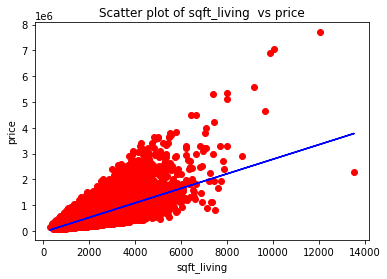

In [20]:
import matplotlib.pyplot as plt

plt.scatter(X,y, color='r')
plt.plot(X, model.predict(X), color ='b')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Scatter plot of sqft_living  vs price')
plt.show()

In [21]:
mean_squared_error(y_test, y_predict)

64179676631.68388

In [22]:
metrics.r2_score(y_test, y_predict)

0.4879814110728805

In [23]:
print(f'R2 for training data is {r2_score(y_train, model.predict(X_train))}')

R2 for training data is 0.49388275658332614


In [24]:
print(f'mean squared error for training data is {mean_squared_error(y_train, model.predict(X_train))}')

mean squared error for training data is 69398887909.34727


In [25]:
print(f'mean squared error for the test data is {mean_squared_error(y_test, model.predict(X_test))}')

mean squared error for the test data is 64179676631.68388


In [26]:
features = data[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'sqft_lot15']]
label = data['price'].values


Multilinear Regression


In [51]:
from sklearn.feature_selection import SelectKBest, chi2
X_new = SelectKBest(k=5).fit_transform(features,label)

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

In [53]:
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X_new, features, test_size=0.2, random_state=30)
model.fit(X_train, y_train)

LinearRegression()

In [54]:
model.coef_

array([[ 1.00000000e+00, -6.82064865e-18, -4.70401662e-16,
         1.54156167e-17, -5.37792954e-16],
       [ 8.80801916e-12,  1.00000000e+00,  6.21333497e-14,
        -3.33066907e-16,  1.04083409e-16],
       [ 5.92681300e-15, -1.72171305e-16,  1.00000000e+00,
         2.05131051e-16, -2.52843739e-15],
       [-1.08032834e-11, -3.33066907e-16,  3.45117435e-13,
         1.00000000e+00, -1.18828558e-16],
       [ 1.25051705e-13,  4.16333634e-17,  8.46476277e-15,
        -5.55111512e-17,  1.00000000e+00],
       [ 4.80290892e+00, -2.16628369e-03,  5.19948470e+00,
        -1.44679516e-02, -5.88927330e-01],
       [-5.11025892e+03,  6.11555550e+00, -2.19543910e+03,
         5.46135158e+00,  4.79971198e+01]])

In [44]:
model.intercept_

array([ 1.16573418e-12, -1.72803993e-11,  4.93649566e-12,  1.63709046e-11,
       -2.04636308e-12,  9.92188588e+04, -7.65310965e+04])

In [45]:
print(f'R2 for training data is {r2_score(y_train, model.predict(X_train))}')

R2 for training data is 0.741698469553467


In [46]:
print(f'mean squared error for training data is {mean_squared_error(y_train, model.predict(X_train))}')

mean squared error for training data is 106571225.43176496


In [49]:
print(f'R2 for test data is {r2_score(y_test, model.predict(X_test))}')

R2 for test data is 0.7410370358217448


In [50]:
print(f'mean squared error for the test data is {mean_squared_error(y_test, model.predict(X_test))}')

mean squared error for the test data is 80640136.90108018
